In [35]:
import pandas as pd
import numpy as np


In [24]:
filepath =  r"../Resources_cleaned/winemag_23000.json"

df = pd.read_json(filepath)
df.head()

,Year,country,description,designation,index,level_0,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,2012,Italy,This structured wine opens with aromas of gree...,None,27331,22453,89,18,Northeastern Italy,Alto Adige,None,Kerin O’Keefe,@kerinokeefe,Erste Neue 2012 Pinot Grigio (Alto Adige),Pinot Grigio,Erste Neue
1,2009,Italy,"Made entirely with Chardonnay, this delivers d...",Brut Saten,25149,20657,88,47,Lombardy,Franciacorta,None,Kerin O’Keefe,@kerinokeefe,Ricci Curbastro 2009 Brut Saten Chardonnay (Fr...,Chardonnay,Ricci Curbastro
2,2009,Italy,"Made with organically farmed fruit, this brigh...",Nessuno,4798,4023,85,16,Central Italy,Umbria,None,None,None,Moretti Omero 2009 Nessuno White (Umbria),White Blend,Moretti Omero
3,2011,Italy,This bright Moscato d'Asti delivers pure expre...,None,79032,65171,87,8,Piedmont,Moscato d'Asti,None,None,None,La Gironda di Galandrino 2011 Moscato d'Asti,Moscato,La Gironda di Galandrino
4,2012,Italy,A blend of 80% Chardonnay and 20% Pinot Bianco...,San Siro Bianco,35104,28803,87,20,Northeastern Italy,Vigneti delle Dolomiti,None,Kerin O’Keefe,@kerinokeefe,Pisoni 2012 San Siro Bianco White (Vigneti del...,White Blend,Pisoni


In [26]:
df.loc[(df["points"]>92) & (df["price"]<60)].count()
# (df["B"] > 50) & (df["C"] == 900)

Year                     738
country                  738
description              738
designation              604
index                    738
level_0                  738
points                   738
price                    738
province                 738
region_1                 717
region_2                 167
taster_name              649
taster_twitter_handle    648
title                    738
variety                  738
winery                   738
dtype: int64

NameError: name 'plot' is not defined

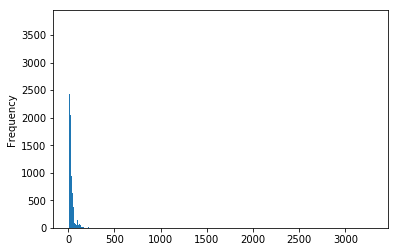

In [31]:
df["price"].plot.hist(bins=1000)
plot.show()

In [30]:
df.describe()

,index,level_0,points,price
count,23628.000000,23628.000000,23628.000000,23628.000000
mean,65072.906171,53649.417513,88.106865,34.372355
std,37481.670825,30948.532358,3.003850,51.234686
min,5.000000,3.000000,80.000000,4.000000
25%,32953.250000,27037.000000,86.000000,15.000000
50%,65121.500000,53620.000000,88.000000,22.000000
75%,97335.250000,80291.250000,90.000000,40.000000
max,129968.000000,107285.000000,100.000000,3300.000000


In [34]:
pd.cut(df['price'], 3000).value_counts().sort_index()

(0.704, 5.099]            18
(5.099, 6.197]            31
(6.197, 7.296]            81
(7.296, 8.395]           224
(8.395, 9.493]           362
(9.493, 10.592]          944
(10.592, 11.691]         545
(11.691, 12.789]         988
(12.789, 13.888]         903
(13.888, 14.987]         758
(14.987, 16.085]        2254
(16.085, 17.184]         747
(17.184, 18.283]         946
(18.283, 19.381]         648
(19.381, 20.48]         1486
(20.48, 21.579]          296
(21.579, 22.677]         626
(22.677, 23.776]         358
(23.776, 24.875]         457
(24.875, 25.973]        1029
(25.973, 27.072]         553
(27.072, 28.171]         398
(28.171, 29.269]         257
(29.269, 30.368]         877
(30.368, 31.467]          71
(31.467, 32.565]         249
(32.565, 33.664]         134
(33.664, 34.763]         138
(34.763, 35.861]         617
(35.861, 36.96]          177
                        ... 
(3267.04, 3268.139]        0
(3268.139, 3269.237]       0
(3269.237, 3270.336]       0
(3270.336, 327

In [42]:
(df['price']
 .pipe(lambda s: pd.Series(np.histogram(s,  bins=3000)))
 .pipe(lambda s: pd.Series(s[0], index=s[1][:-1]))
 .pipe(lambda s: s/s.sum())
)

4.000000       0.000762
5.098667       0.001312
6.197333       0.003428
7.296000       0.009480
8.394667       0.015321
9.493333       0.039953
10.592000      0.023066
11.690667      0.041815
12.789333      0.038217
13.888000      0.032081
14.986667      0.095395
16.085333      0.031615
17.184000      0.040037
18.282667      0.027425
19.381333      0.062891
20.480000      0.012528
21.578667      0.026494
22.677333      0.015152
23.776000      0.019341
24.874667      0.043550
25.973333      0.023404
27.072000      0.016844
28.170667      0.010877
29.269333      0.037117
30.368000      0.003005
31.466667      0.010538
32.565333      0.005671
33.664000      0.005841
34.762667      0.026113
35.861333      0.007491
                 ...   
3267.040000    0.000000
3268.138667    0.000000
3269.237333    0.000000
3270.336000    0.000000
3271.434667    0.000000
3272.533333    0.000000
3273.632000    0.000000
3274.730667    0.000000
3275.829333    0.000000
3276.928000    0.000000
3278.026667    0